#Fitness Function
É ela que vai dar feedback para o algoritmo genético de se aquela solução que ele propôs é boa ou o quanto ela é boa ou não. O algoritmo genético não sabe avaliar a qualidade da resposta. Assim, criamos essa função para avaliar a solução proposta pelo algoritmo genético e dar um feedback para ele. O algoritmo genetico busca maximizar a função. Quanto maior o valor, mais perto ele está de resolver o problema

In [3]:
import numpy as np
def equation_func(solution):
  x = solution[0]
  equation_output = 2*x + 5
  target_otput = 20
  fitness = 1.0/ np.abs(equation_output - target_otput + 1e-8)
  return (fitness)

In [4]:
lista = [-10,-5,0,5,7.5,10]
for value in lista:
  result = equation_func([value])
  print(result)

0.028571428579591836
0.040000000016
0.06666666671111111
0.2000000004
100000000.0
0.1999999996


#Implementando algoritmo Genético

In [3]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00


In [4]:
import pygad
import numpy as np

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


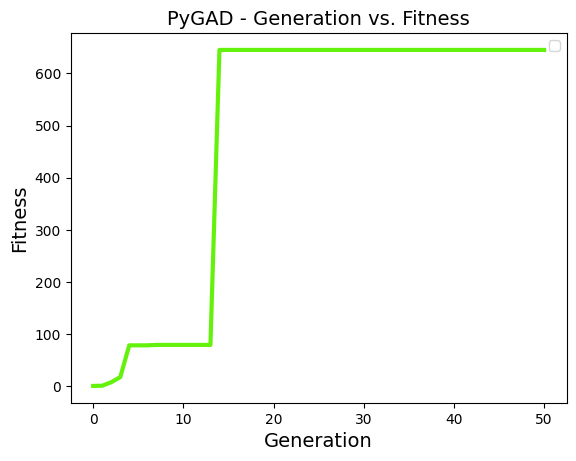

Melhor solução:  7.5


In [10]:
import numpy as np
def equation_func(ga_instance,solution, solution_idx):
  x = solution[0]
  equation_output = 2*x + 5
  target_otput = 20
  fitness = 1.0/ np.abs(equation_output - target_otput + 1e-8)
  return (fitness)

ga_instance = pygad.GA(
    num_generations=50,
    num_parents_mating=10,
    fitness_func=equation_func,
    sol_per_pop=20,
    num_genes=1,
    gene_type=float,
    init_range_low=-10,
    init_range_high=10
)

ga_instance.run()
ga_instance.plot_fitness()
solution,solution_fitness, _ = ga_instance.best_solution()
print("Melhor solução: ", round(solution[0],1))

#Implementando o problema binário

In [5]:
itens = [
    ("canivete",10,1),
    ("feijão",20,5),
    ("batatas",15,10),
    ("lanterna",2,1),
    ("saco de dormir",30,7),
    ("corda",10,5),
    ("bussula",30,1),
]

limite_peso = 15

def fitness_func(ga_instance,solution, solution_idx):
  pontos = 0
  peso = 0
  for i in range(len(solution)):
    if solution[i] ==1:
      pontos += itens[i][1]
      peso += itens[i][2]
  if peso > limite_peso:
    pontos = -1
  return pontos

ga_instance = pygad.GA(
    num_generations=100,
    num_parents_mating=5,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=len(itens),
    gene_type=int,
    init_range_low=0,
    init_range_high=2
)

ga_instance.run()
solution,solution_fitness,_ = ga_instance.best_solution()
print("melhor solução", solution)
print("Pontos", solution_fitness)

melhor solução [1 1 0 1 1 0 1]
Pontos 92


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
